In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from pandas.plotting import autocorrelation_plot

<ipython-input-1-1e253949391e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


            Sales
Month            
2011-01-01  266.0
2011-02-01  145.9
2011-03-01  183.1
2011-04-01  119.3
2011-05-01  180.3


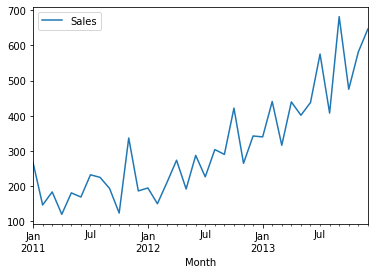

In [4]:
def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

series = read_csv('arimats.csv', header=0, parse_dates=[0], index_col=0, squeeze=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

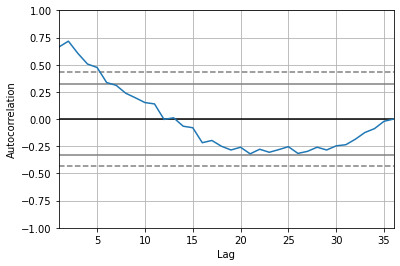

In [5]:
autocorrelation_plot(series)
pyplot.show()

In [6]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

ModuleNotFoundError: No module named 'statsmodels'